# Load pickle file with pred and targets

In [26]:

import pickle
import numpy as np
import os
import sklearn
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define path to your pickle file where targets and predictions are stored
seed = "9001"
# pickle_file_test = "/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/" + seed + "/save/predictions_2s_25_epoch/test_predictions.pkl"
pickle_file_test = "/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/" + seed + "/save/predictions/test_predictions.pkl"

# set:
pickle_file = pickle_file_test

combined_batch_ids = []
combined_predictions = []
combined_targets = []
combined_lens = []

# Open file and read all objects (batches). Otherwise only last batch is loaded
with open(pickle_file, "rb") as f:
    while True:
        try:
            batch = pickle.load(f)
            # Append data for each batch
            combined_batch_ids.extend(batch["batch_ids"])
            combined_predictions.append(batch["predictions"])
            combined_targets.append(batch["targets"])
            combined_lens.append(batch["lens"])
        except EOFError:
            break

# Concatenate predictions, targets, and lens across all batches
combined_predictions = np.concatenate(combined_predictions, axis=0)
combined_targets = np.concatenate(combined_targets, axis=0)
combined_lens = np.concatenate(combined_lens, axis=0)

print("len predictions: ", len(combined_predictions))
print("len targets: ", len(combined_targets))

len predictions:  2598
len targets:  2598


# Load accent_encoder file and create dict

In [27]:
accent_encoder = '/home/projects/vokquant/accent-recog-slt2022/CommonAccent/results/W2V2/AT/wav2vec2-large-xlsr-53-augmented/' + seed + '/save/accent_encoder.txt'
with open(accent_encoder, 'r') as f:
    accent_encoder = f.read().splitlines()

encoder_dict = {}
for line in accent_encoder[:-2]:
    region, encoding = line.split(' => ')
    # print(region, encoding)
    encoder_dict[encoding] = (region.strip().strip("'"))
print(encoder_dict)

# ALTERNATIVE:  just type the class mapping:
# class_mapping = {
# '62390': 0, '70221': 1, '30860': 2, '31035': 3, '50413': 4, '41706': 5, '70709': 6, '80105': 7, '40719': 8, '70334': 9, '70406': 10, '31405': 11, '32210': 12, '70627': 13, '50304': 14, '70706': 15, '31207': 16, '40702': 17, '40423': 18, '40410': 19, '32309': 20, '41411': 21, '10702': 22, '70208': 23, '70734': 24, '50626': 25, '80225': 26, '30501': 27, '70622': 28, '40621': 29, '50621': 30, '62216': 31, '41342': 32, '61032': 33, '30910': 34, '10903': 35, '50617': 36, '31110': 37, '70615': 38, '20622': 39, '20914': 40, '80411': 41, '50612': 42, '50502': 43, '61627': 44, '32324': 45, '70516': 46, '10925': 47, '40806': 48, '80239': 49, '20321': 50, '80227': 51, '70804': 52, '80128': 53, '41804': 54, '31652': 55, '61257': 56, '30719': 57, '60350': 58, '50509': 59, '70402': 60, '20619': 61, '10401': 62, '61628': 63, '70824': 64, '70606': 65, '50206': 66, '61254': 67, '62105': 68, '31916': 69, '50210': 70, '40402': 71, '61115': 72, '70908': 73, '70419': 74, '70366': 75, '61743': 76, '32518': 77, '40914': 78, '31617': 79, '31401': 80, '50212': 81, '80212': 82, '41501': 83, '70326': 84, '40605': 85, '70362': 86, '70217': 87, '62144': 88, '10428': 89, '32519': 90, '10612': 91, '41102': 92, '50618': 93, '32002': 94, '50506': 95, '21002': 96, '62135': 97, '20604': 98, '61251': 99, '50423': 100, '31814': 101, '70825': 102, '31551': 103, '80109': 104, '31204': 105, '61756': 106, '70920': 107, '70504': 108
# }

{'0': 'Süd-/Mittelbairisch', '1': 'Bairisch-Alemannisch', '2': 'Mittelbairisch', '3': 'Südbairisch', '4': 'Alemannisch', '5': '(West-)Mittelbairisch'}


# Connect encoder ids with labels

In [28]:
# get max value of the prediction
combined_predictions_max = np.argmax(combined_predictions, axis=1)
#convert combined_predictions_max and targets to accent
combined_predictions_family = []
for i in combined_predictions_max:
    combined_predictions_family.append(encoder_dict[str(i)])

combined_targets_family = []
for i in combined_targets:
    combined_targets_family.append(encoder_dict[str(i)])


In [35]:
from sklearn.metrics import f1_score
import numpy as np
# unique_values = list(encoder_dict.values())
# print(unique_values)

# # Accuracy and F1 score
# correct = 0
# total = 0
# for i in range(len(combined_predictions_family)):
#     if combined_predictions_family[i] == combined_targets_family[i]:
#         correct += 1
#     total += 1
# print("Accuracy (Dialektfamilie): ", correct/total)

# f1 = f1_score(combined_targets_family, combined_predictions_family, average='weighted')
# print("F1 score (Dialektfamilie): ", f1)

# unique_values = np.unique(combined_predictions_family)
# print("Unique values (Dialektfamilie): ", unique_values)
# # print accuarcy per class
# print("Accuracy for class: ")
# for i in unique_values:
#     correct = 0
#     total = 0
#     for j in range(len(combined_predictions_family)):
#         if combined_predictions_family[j] == i and combined_targets_family[j] == i:
#             correct += 1
#         if combined_targets_family[j] == i:
#             total += 1
#     #avoid division by zero
#     if total == 0:
#         print(i, ": ", 0)
#     else:
#         print(i, ": ", np.round(correct/total, 2))

def evaluate_predictions(predictions, targets, encoder_dict=None):
    """
    Evaluate predictions by calculating overall accuracy, F1 score, 
    and per-class accuracy.
    Args:
    - predictions: list or array of predicted values.
    - targets: list or array of ground truth values.
    - encoder_dict: dictionary of encodings, optional, to display unique values.
    """
    if encoder_dict:
        unique_values = list(encoder_dict.values())
        print("Unique values (Encoder Dictionary): ", unique_values)

    # Overall accuracy
    accuracy = sum([pred == target for pred, target in zip(predictions, targets)]) / len(targets)
    print("Accuracy (Dialektfamilie): ", accuracy)

    # Weighted F1 score
    f1 = f1_score(targets, predictions, average='weighted')
    print("F1 score (Dialektfamilie): ", f1)

    # Unique values in predictions
    unique_values_np = np.unique(predictions)
    print("Unique values (Dialektfamilie): ", unique_values_np)

    # Per-class accuracy
    print("Accuracy for each class:")
    for value in unique_values_np:
        class_correct = sum([pred == target == value for pred, target in zip(predictions, targets)])
        class_total = sum([target == value for target in targets])
        if class_total == 0:
            print(value, ": ", 0)
        else:
            print(value, ": ", np.round(class_correct / class_total, 2))
    return accuracy, f1, unique_values

# check

Unique values (Encoder Dictionary):  ['Süd-/Mittelbairisch', 'Bairisch-Alemannisch', 'Mittelbairisch', 'Südbairisch', 'Alemannisch', '(West-)Mittelbairisch']
Accuracy (Dialektfamilie):  0.7217090069284064
F1 score (Dialektfamilie):  0.7211914590809284
Unique values (Dialektfamilie):  ['(West-)Mittelbairisch' 'Alemannisch' 'Bairisch-Alemannisch'
 'Mittelbairisch' 'Süd-/Mittelbairisch' 'Südbairisch']
Accuracy for each class:
(West-)Mittelbairisch :  0.51
Alemannisch :  0.83
Bairisch-Alemannisch :  0
Mittelbairisch :  0.77
Süd-/Mittelbairisch :  0.81
Südbairisch :  0.45


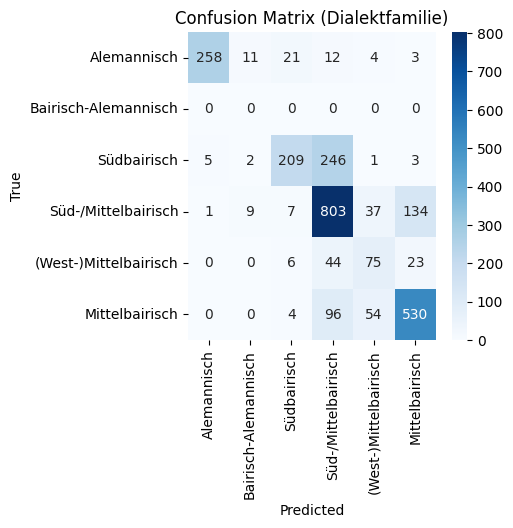

In [38]:
accuracy, f1, unique_values = evaluate_predictions(combined_predictions_family, combined_targets_family, encoder_dict)

# confusion_matrix
confusion_matrix1 = sklearn.metrics.confusion_matrix(combined_targets_family, combined_predictions_family, labels=unique_values)

# add labels to confusion matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix1, index=unique_values, columns=unique_values)
# sort columns and rows by "Alemannisch", "Bairisch-Alemannisch", "Südbairisch", "Süd-/Mittelbairisch", "(West-)Mittelbairisch", "Mittelbairisch"
confusion_matrix1 = confusion_matrix1.reindex(index=["Alemannisch", "Bairisch-Alemannisch", "Südbairisch", "Süd-/Mittelbairisch", "(West-)Mittelbairisch", "Mittelbairisch"], columns=["Alemannisch", "Bairisch-Alemannisch", "Südbairisch", "Süd-/Mittelbairisch", "(West-)Mittelbairisch", "Mittelbairisch"])

# plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Dialektfamilie)')
plt.show()

# Without (West-)Mittelbairisch

Unique values (Encoder Dictionary):  ['Süd-/Mittelbairisch', 'Bairisch-Alemannisch', 'Mittelbairisch', 'Südbairisch', 'Alemannisch', '(West-)Mittelbairisch']
Accuracy (Dialektfamilie):  0.7513471901462664
F1 score (Dialektfamilie):  0.7492914018331422
Unique values (Dialektfamilie):  ['Alemannisch' 'Bairisch-Alemannisch' 'Mittelbairisch'
 'Süd-/Mittelbairisch' 'Südbairisch']
Accuracy for each class:
Alemannisch :  0.83
Bairisch-Alemannisch :  0
Mittelbairisch :  0.82
Süd-/Mittelbairisch :  0.81
Südbairisch :  0.45


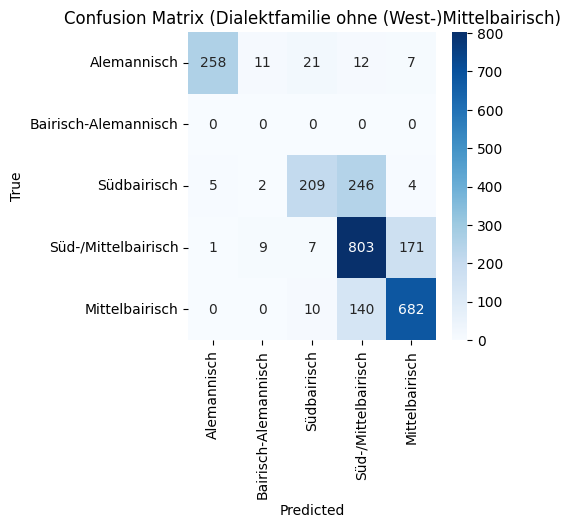

In [39]:
# now put (West-)Mittelbairisch and Mittelbairisch together
combined_targets_family_together = []
for i in combined_targets_family:
    if i == 'Mittelbairisch' or i == '(West-)Mittelbairisch':
        combined_targets_family_together.append('Mittelbairisch')
    else:
        combined_targets_family_together.append(i)

combined_predictions_family_together = []
for i in combined_predictions_family:
    if i == 'Mittelbairisch' or i == '(West-)Mittelbairisch':
        combined_predictions_family_together.append('Mittelbairisch')
    else:
        combined_predictions_family_together.append(i)
        
accuracy, f1, unique_values_together = evaluate_predictions(combined_predictions_family_together, combined_targets_family_together, encoder_dict)

confusion_matrix2 = sklearn.metrics.confusion_matrix(combined_targets_family_together, combined_predictions_family_together, labels=unique_values_together)

# add labels to confusion matrix
confusion_matrix2 = pd.DataFrame(confusion_matrix2, index=unique_values_together, columns=unique_values_together)
# sort columns and rows by "Alemannisch", "Südbairisch", "Süd-/Mittelbairisch", "(West-)Mittelbairisch", "Mittelbairisch"
confusion_matrix2 = confusion_matrix2.reindex(index=["Alemannisch", "Bairisch-Alemannisch", "Südbairisch", "Süd-/Mittelbairisch", "Mittelbairisch"], columns=["Alemannisch", "Bairisch-Alemannisch", "Südbairisch", "Süd-/Mittelbairisch", "Mittelbairisch"])

# plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Dialektfamilie ohne (West-)Mittelbairisch)')
plt.show()


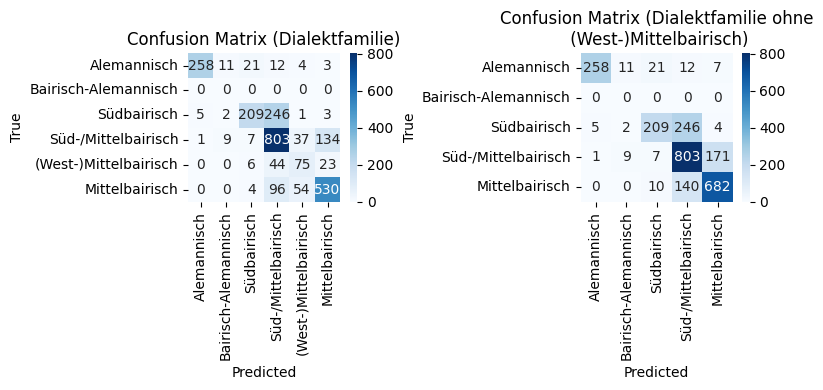

In [43]:
# print confusion_matrix1 and confusion_matrix2 left and right to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')
ax1.set_title('Confusion Matrix (Dialektfamilie)')
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')
ax2.set_title('Confusion Matrix (Dialektfamilie ohne\n (West-)Mittelbairisch)')
plt.tight_layout()
plt.show()

